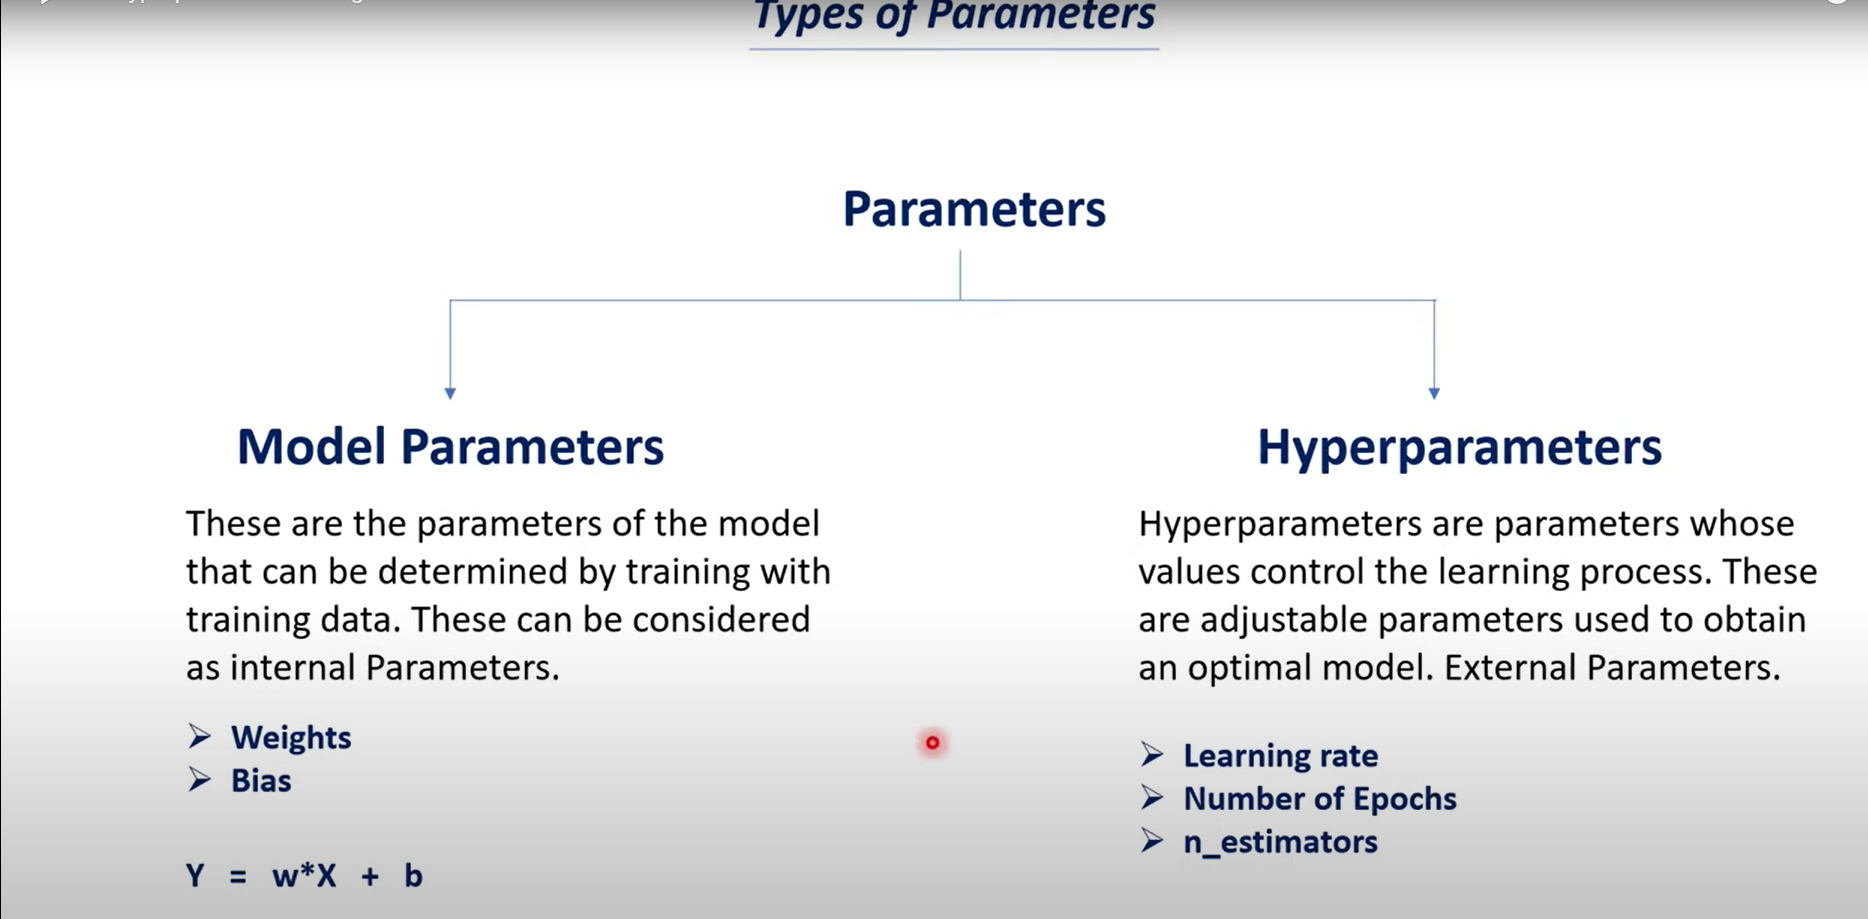

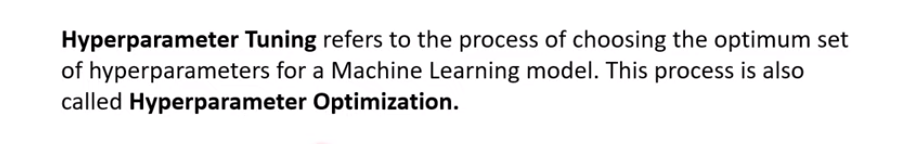

In [36]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [37]:
breast_cancer_df = sklearn.datasets.load_breast_cancer()

In [38]:
breast_cancer_df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [39]:
df = pd.DataFrame(breast_cancer_df.data, columns = breast_cancer_df.feature_names)

In [40]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [41]:
df["label"] = breast_cancer_df.target

In [42]:
df["label"].value_counts()

label
1    357
0    212
Name: count, dtype: int64

as you can see the data is imbalance but not that much but we use SMOTE technique to balance this data equally

In [43]:
X = df.drop("label",axis = 1)

In [44]:
Y = df["label"]

In [46]:
X=np.array(X)
Y= np.array(Y)

***GridSearchCv***

 GridSearch Cv is used for determining the best parameters for our model

***C (Regularization parameter):***

The C parameter trades off correct classification of training examples against maximization of the decision function's margin.

A smaller C encourages a larger margin and a simpler decision function, potentially underfitting the data.
A larger C aims to classify all training examples correctly, potentially overfitting the data.
kernel:

The kernel parameter specifies the kernel type to be used in the algorithm.

***Common choices include:***

linear: Linear kernel for linear separation.

rbf (Radial Basis Function): Non-linear kernel that can handle non-linear separation by mapping data into higher-dimensional space.

poly: Polynomial kernel for non-linear separation.

sigmoid: Sigmoid kernel.

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [52]:
model = SVC()

In [57]:
#HYPER PARAMETERS
parameters = {'C': [1, 10, 100], 'kernel': ['linear', 'rbf',"poly","sigmoid"]}


In [58]:
classifier = GridSearchCV(model,parameters,cv = 5,)

In [72]:
classifier.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'kernel': ['linear', 'rbf']})

In [73]:
classifier.cv_results_

{'mean_fit_time': array([1.21584291e+00, 3.20000648e-03, 2.07115240e+00, 3.53598595e-03,
        4.96527905e+00, 2.80070305e-03]),
 'std_fit_time': array([1.19222461e+00, 9.79724905e-04, 4.75615330e-01, 8.20063499e-04,
        2.99864963e+00, 9.79766721e-04]),
 'mean_score_time': array([0.00059967, 0.00199995, 0.0007998 , 0.00176101, 0.00119996,
        0.00119939]),
 'std_score_time': array([7.99978367e-04, 2.43140197e-07, 9.79549916e-04, 9.00413140e-04,
        9.79766848e-04, 9.79296686e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel'

In [80]:
best_svc = classifier.best_estimator_
best_svc 

SVC(C=100, kernel='linear')

In [81]:
#Highest Accuracy
higher_accuracy = classifier.best_score_

In [82]:
higher_accuracy

0.9714285714285715

In [83]:
result = pd.DataFrame(classifier.cv_results_)

In [84]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.215843,1.192225,0.000600,7.999784e-04,1,linear,"{'C': 1, 'kernel': 'linear'}",0.956044,0.978022,0.978022,0.956044,0.912088,0.956044,0.024076,2
1,0.003200,0.000980,0.002000,2.431402e-07,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.923077,0.879121,0.967033,0.868132,0.879121,0.903297,0.037038,6
2,2.071152,0.475615,0.000800,9.795499e-04,10,linear,"{'C': 10, 'kernel': 'linear'}",0.956044,0.945055,0.967033,0.978022,0.923077,0.953846,0.018906,3
3,0.003536,0.000820,0.001761,9.004131e-04,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.978022,0.879121,0.956044,0.857143,0.901099,0.914286,0.045786,5
4,4.965279,2.998650,0.001200,9.797668e-04,100,linear,"{'C': 100, 'kernel': 'linear'}",0.967033,0.978022,1.000000,0.989011,0.923077,0.971429,0.026556,1
5,0.002801,0.000980,0.001199,9.792967e-04,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.989011,0.879121,0.956044,0.890110,0.912088,0.925275,0.041351,4


In [87]:
y_pred = best_svc.predict(X_test)


In [89]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)


In [90]:
accuracy

0.956140350877193

***Randomized Search Cv***

In [97]:
classifier = RandomizedSearchCV(model,parameters,cv = 5)

In [98]:
classifier.fit(X_train,y_train)

C:\Users\Pc\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  rng = check_random_state(self.random_state)


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 10, 100],
                                        'kernel': ['linear', 'rbf']})

In [99]:
best_svc = classifier.best_estimator_
best_svc

SVC(C=100, kernel='linear')

In [100]:
y_pred = best_svc.predict(X_test)


In [101]:
accuracy = accuracy_score(y_test, y_pred)

In [102]:
accuracy

0.956140350877193